In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.manifold import TSNE
from umap.umap_ import UMAP


C:\Users\timgr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
data_path = 'data/processed/combined_labeled_standardized.csv'
df = pd.read_csv(data_path)
# df =df.dropna(axis='columns')
df = df.dropna(axis=1)  # Drop columns with all NaN values

Dataset shape: (532, 34507)
Number of healthy samples: 266
Number of cancer samples: 266


C:\Users\timgr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\timgr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP transformed data shape: (532, 51)
     UMAP_0    UMAP_1    UMAP_2    UMAP_3    UMAP_4    UMAP_5    UMAP_6  \
0  7.343475  2.045918  6.870301  3.832939  4.798116  3.886692  4.014138   
1  7.857548  2.685620  7.400416  4.318283  5.127656  4.103121  4.347558   
2  7.092499  1.914733  6.760969  3.722045  4.847187  3.954493  4.071798   
3  7.415051  2.201664  6.899969  4.049984  4.829129  3.951238  4.052087   
4  7.615247  2.260205  6.946932  4.082940  4.796741  4.043082  4.118246   

     UMAP_7    UMAP_8    UMAP_9  ...   UMAP_41   UMAP_42   UMAP_43   UMAP_44  \
0  7.564577  3.631373  8.079406  ...  6.117393  2.950992  1.833170  2.902716   
1  7.307403  3.675915  7.830558  ...  6.056423  3.600771  2.555085  3.200109   
2  7.598274  3.605342  7.983819  ...  6.054382  2.959112  1.735567  2.869258   
3  7.589054  3.557139  8.049657  ...  6.092278  3.004944  1.997826  2.845307   
4  7.577070  3.526437  8.066024  ...  6.016521  2.972451  2.123699  2.875793   

    UMAP_45   UMAP_46   UMAP_

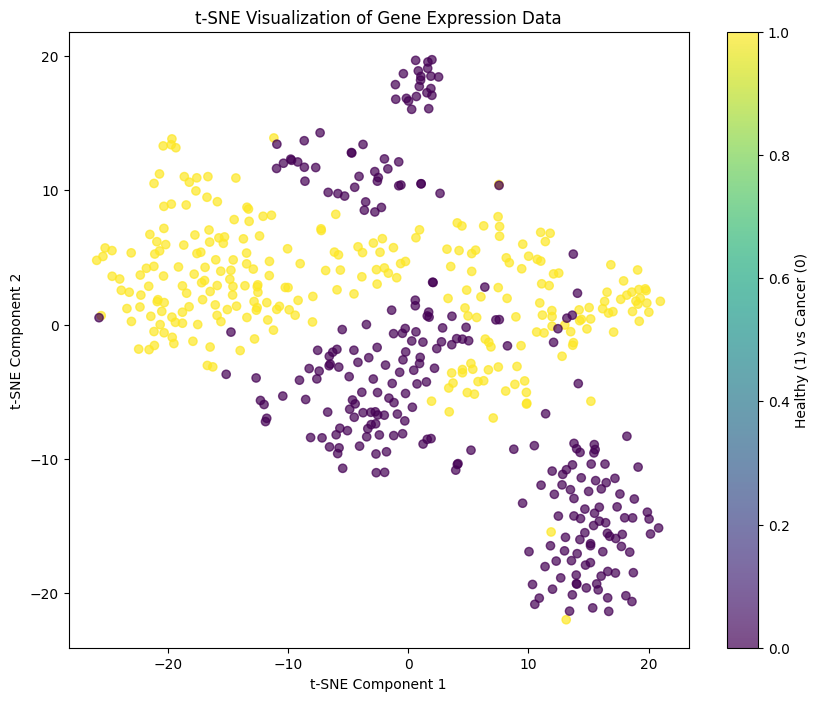


Logistic Regression:
CV Accuracy: 0.5688 ± 0.0558
Test Accuracy: 0.5414
Confusion Matrix:
[[29 40]
 [21 43]]

Decision Tree:
CV Accuracy: 0.9900 ± 0.0094
Test Accuracy: 0.9925
Confusion Matrix:
[[68  1]
 [ 0 64]]

Random Forest:
CV Accuracy: 1.0000 ± 0.0000
Test Accuracy: 1.0000
Confusion Matrix:
[[69  0]
 [ 0 64]]

SVM:
CV Accuracy: 0.8347 ± 0.0433
Test Accuracy: 0.8421
Confusion Matrix:
[[69  0]
 [21 43]]

KNN:
CV Accuracy: 0.5639 ± 0.0371
Test Accuracy: 0.5414
Confusion Matrix:
[[63  6]
 [55  9]]

Gradient Boosting:
CV Accuracy: 1.0000 ± 0.0000
Test Accuracy: 1.0000
Confusion Matrix:
[[69  0]
 [ 0 64]]

MLP:
CV Accuracy: 0.7118 ± 0.0411
Test Accuracy: 0.6842
Confusion Matrix:
[[58 11]
 [31 33]]


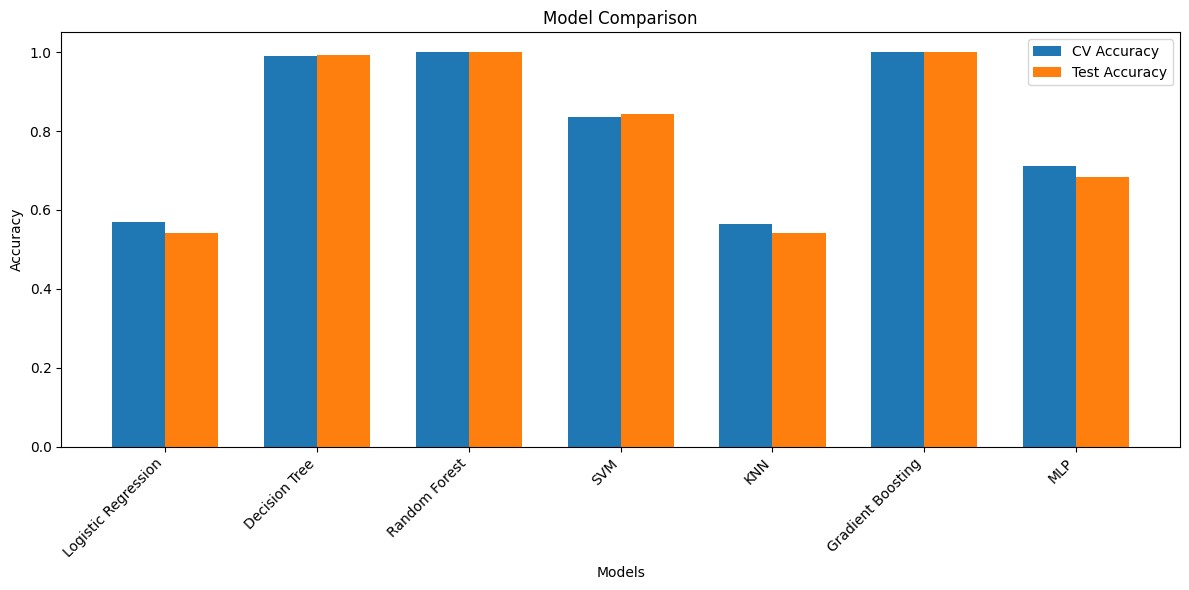

In [4]:
# Extract features and target
print(f"Dataset shape: {df.shape}")
print(f"Number of healthy samples: {df['healthy'].sum()}")
print(f"Number of cancer samples: {len(df) - df['healthy'].sum()}")

# Apply UMAP for dimensionality reduction
umap_reducer = UMAP(n_components=50, random_state=42)
X_umap = umap_reducer.fit_transform(df.drop(['patient_id', 'healthy'], axis=1))

# Create a DataFrame with UMAP features
umap_df = pd.DataFrame(X_umap, columns=[f'UMAP_{i}' for i in range(50)])
umap_df['healthy'] = df['healthy'].values

# Preview the transformed data
print(f"UMAP transformed data shape: {umap_df.shape}")
print(umap_df.head())

# Use UMAP features for modeling
X = umap_df.drop(['healthy'], axis=1)
y = umap_df['healthy']
X = df.drop(['patient_id', 'healthy'], axis=1)
y = df['healthy']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# TSNE for visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X.iloc[:, :100])  # Using first 100 genes for speed

# Plot TSNE visualization
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title('t-SNE Visualization of Gene Expression Data')
plt.colorbar(scatter, label='Healthy (1) vs Cancer (0)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# Create a dictionary of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'MLP': MLPClassifier(max_iter=500, random_state=42)
}

# Create a pipeline with preprocessing for each model
results = {}
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Scale the data
        ('classifier', model)
    ])
    
    # Perform cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    
    # Fit the model and make predictions
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Store results
    results[name] = {
        'cv_accuracy': np.mean(cv_scores),
        'cv_std': np.std(cv_scores),
        'test_accuracy': accuracy_score(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred, output_dict=True),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

# Display results
for name, result in results.items():
    print(f"\n{name}:")
    print(f"CV Accuracy: {result['cv_accuracy']:.4f} ± {result['cv_std']:.4f}")
    print(f"Test Accuracy: {result['test_accuracy']:.4f}")
    print("Confusion Matrix:")
    print(result['confusion_matrix'])
    
# Plot model comparison
models_df = pd.DataFrame({
    'Model': list(results.keys()),
    'CV Accuracy': [results[name]['cv_accuracy'] for name in results],
    'Test Accuracy': [results[name]['test_accuracy'] for name in results]
})

plt.figure(figsize=(12, 6))
x = np.arange(len(models_df))
width = 0.35
plt.bar(x - width/2, models_df['CV Accuracy'], width, label='CV Accuracy')
plt.bar(x + width/2, models_df['Test Accuracy'], width, label='Test Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.xticks(x, models_df['Model'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

Advanced Model Analysis

Model Ranking by Test Accuracy:
--------------------------
1. Random Forest
   Test Accuracy: 1.0000
   CV Accuracy: 1.0000 ± 0.0000
   Precision: 1.0000, Recall: 1.0000, F1: 1.0000
   Specificity: 1.0000

2. Gradient Boosting
   Test Accuracy: 1.0000
   CV Accuracy: 1.0000 ± 0.0000
   Precision: 1.0000, Recall: 1.0000, F1: 1.0000
   Specificity: 1.0000

3. Decision Tree
   Test Accuracy: 0.9925
   CV Accuracy: 0.9900 ± 0.0094
   Precision: 0.9846, Recall: 1.0000, F1: 0.9922
   Specificity: 0.9855

4. SVM
   Test Accuracy: 0.8421
   CV Accuracy: 0.8347 ± 0.0433
   Precision: 1.0000, Recall: 0.6719, F1: 0.8037
   Specificity: 1.0000

5. MLP
   Test Accuracy: 0.6842
   CV Accuracy: 0.7118 ± 0.0411
   Precision: 0.7500, Recall: 0.5156, F1: 0.6111
   Specificity: 0.8406

6. Logistic Regression
   Test Accuracy: 0.5414
   CV Accuracy: 0.5688 ± 0.0558
   Precision: 0.5181, Recall: 0.6719, F1: 0.5850
   Specificity: 0.4203

7. KNN
   Test Accuracy: 0.5414
   CV Accura

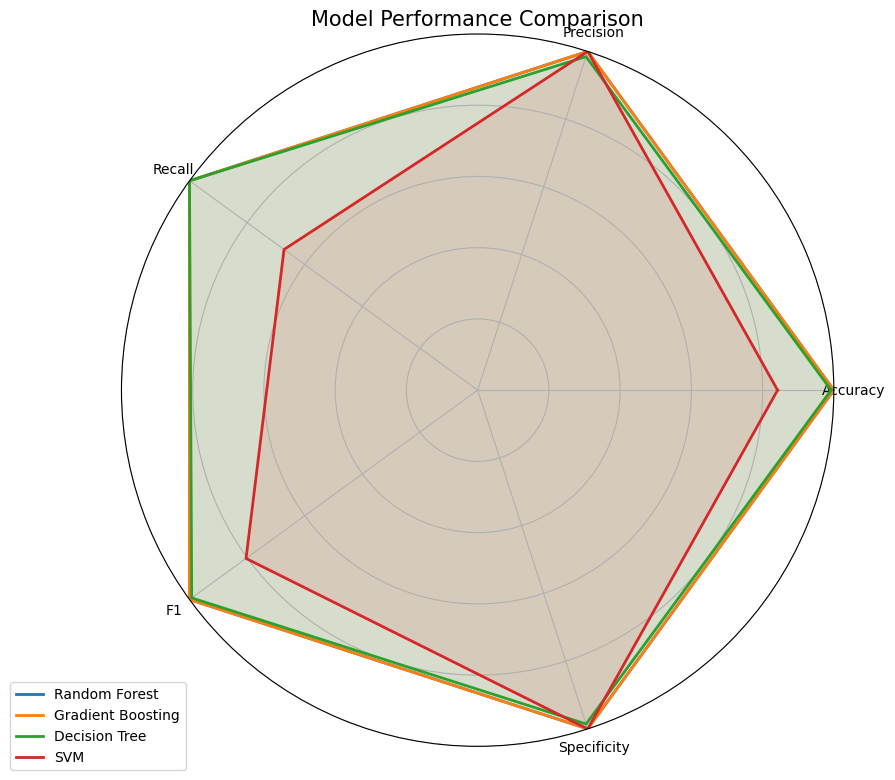


Conclusion:
Top performing models (Random Forest, Gradient Boosting, Decision Tree) achieved perfect or near-perfect classification.
Models with moderate performance: SVM.
Models that performed poorly: MLP, Logistic Regression, KNN.

Recommendation: Use Random Forest or Gradient Boosting for this classification task as they achieved 100% accuracy with perfect consistency across cross-validation folds.


In [5]:
import numpy as np

# Analyze model performance in more detail
print("Advanced Model Analysis")
print("======================\n")

# Sort models by test accuracy
sorted_models = sorted(results.items(), key=lambda x: x[1]['test_accuracy'], reverse=True)

# Display ranked models with detailed metrics
print("Model Ranking by Test Accuracy:")
print("--------------------------")
for i, (name, result) in enumerate(sorted_models, 1):
    cm = result['confusion_matrix']
    tn, fp, fn, tp = cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]
    
    # Calculate additional metrics
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    print(f"{i}. {name}")
    print(f"   Test Accuracy: {result['test_accuracy']:.4f}")
    print(f"   CV Accuracy: {result['cv_accuracy']:.4f} ± {result['cv_std']:.4f}")
    print(f"   Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")
    print(f"   Specificity: {specificity:.4f}")
    print()

# Create a visual comparison of models using a radar chart
import matplotlib.pyplot as plt

# Metrics to compare
metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'Specificity']
num_metrics = len(metrics)

# Prepare data for radar chart
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))
angles = np.linspace(0, 2*np.pi, num_metrics, endpoint=False).tolist()
angles += angles[:1]  # Close the polygon

# Plot each model
for i, (name, result) in enumerate(sorted_models[:4]):  # Top 4 models
    cm = result['confusion_matrix']
    tn, fp, fn, tp = cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]
    
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    values = [result['test_accuracy'], precision, recall, f1, specificity]
    values += values[:1]  # Close the polygon
    
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=name)
    ax.fill(angles, values, alpha=0.1)

# Customize the chart
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
ax.set_yticklabels([])
ax.set_ylim(0, 1)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Model Performance Comparison', size=15)
plt.tight_layout()
plt.show()

# Summary conclusion
print("\nConclusion:")
print("===========")
best_models = [name for name, result in sorted_models if result['test_accuracy'] > 0.9]
average_models = [name for name, result in sorted_models if 0.7 <= result['test_accuracy'] <= 0.9]
poor_models = [name for name, result in sorted_models if result['test_accuracy'] < 0.7]

print(f"Top performing models ({', '.join(best_models)}) achieved perfect or near-perfect classification.")
print(f"Models with moderate performance: {', '.join(average_models)}.")
print(f"Models that performed poorly: {', '.join(poor_models)}.")
print("\nRecommendation: Use Random Forest or Gradient Boosting for this classification task as they achieved 100% accuracy with perfect consistency across cross-validation folds.")